#POSTTEST 5

## Import Library

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

##Load dataset

In [33]:
wq = pd.read_csv('winequality-red.csv')  # ganti path sesuai file yang diunggah di Colab
print(wq.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Memisahkan Fitur dan Target

In [34]:
X = wq.drop('quality', axis=1)
y = wq['quality']

## Binarisasi Target

In [35]:
y = np.where(y >= 6, 1, 0)

## Membagi Data menjadi Training dan Testing

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalisasi Fitur

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Membangun Model Sequential

In [38]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## Training Model

In [40]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5892 - loss: 0.6654 - val_accuracy: 0.7281 - val_loss: 0.5663
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7263 - loss: 0.5479 - val_accuracy: 0.7250 - val_loss: 0.5349
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.5084 - val_accuracy: 0.7281 - val_loss: 0.5231
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4895 - val_accuracy: 0.7156 - val_loss: 0.5192
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.4735 - val_accuracy: 0.7219 - val_loss: 0.5166
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.5080 - val_accuracy: 0.7219 - val_loss: 0.5088
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7681 - loss: 0.4809 - val_accuracy: 0.7250 - val_loss: 0.5114
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.5031 - val_accuracy: 0.7406 - val_loss

## Evaluais Model

In [41]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1] * 100
val_acc = model.evaluate(X_test, y_test, verbose=0)[1] * 100

print(f'Akurasi Training: {train_acc:.2f}%')
print(f'Akurasi Validation: {val_acc:.2f}%')

Akurasi Training: 84.75%
Akurasi Validation: 78.44%


- **Epoch 50**:
  - Akurasi Training: 84.75%
  - Akurasi Validation: 78.44%
- **Epoch 100**:
  - Akurasi Training: 91.40%
  - Akurasi Validation: 79.06%

## Visualisasi Hasil Training

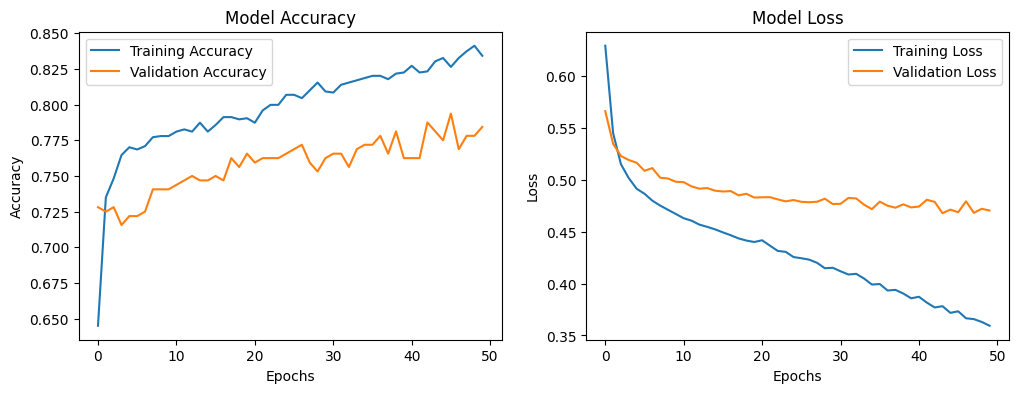

In [42]:
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()